In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importli

In [2]:
data=pd.read_csv("Datasets/Fraud_check.csv")

In [3]:
data.loc[(data['Taxable.Income']<=30000),'Risky']=1
data.loc[(data['Taxable.Income']>=30000),'Risky']=0

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
0,NO,Single,68833,50047,10,YES,0.0
1,YES,Divorced,33700,134075,18,YES,0.0
2,NO,Married,36925,160205,30,YES,0.0
3,YES,Single,50190,193264,15,YES,0.0
4,NO,Married,81002,27533,28,NO,0.0


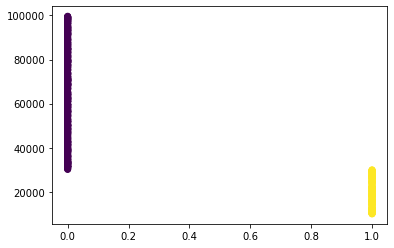

In [16]:
plt.scatter(data['Risky'],data['Taxable.Income'], c=data['Risky'])

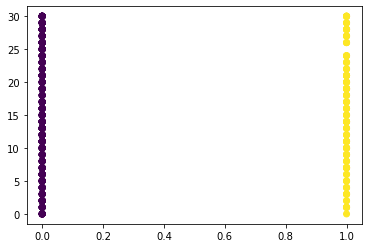

In [20]:
plt.scatter(data['Risky'],data['Work.Experience'], c=data['Risky'])

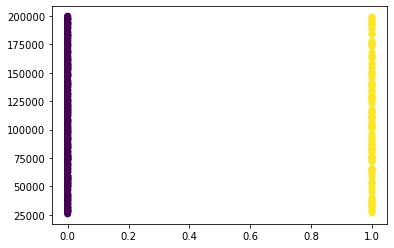

In [21]:
plt.scatter(data['Risky'],data['City.Population'], c=data['Risky'])

In [22]:
x=data['Taxable.Income']

In [23]:
y=data['Risky']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
model=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [26]:
model.fit(np.array(x_train).reshape(-1,1),np.array(y_train))

C:\Users\Pavan K M\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Pavan K M\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [27]:
y_pred=model.predict(np.array(x_test).reshape(-1,1))
y_pred

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1.])

In [28]:
model.score(np.array(x_test).reshape(-1,1),y_pred)

1.0

In [29]:
model.score(np.array(x_test).reshape(-1,1),y_test)

1.0

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.array(x_test).reshape(-1,1),y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)